In [1]:
##### Mudar para grupo em ver de department ex: Fresh, Dry, etc...
#Intuito de sinalizar melhores horarios para alocar recursos com pessoal.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Sales_By_Hour.csv", parse_dates=['Date'])
df.describe()

,Date,Sum of Amount
count,2920438,2.920438e+06
mean,2021-10-01 17:44:27.626431488,9.944989e+00
min,2021-07-01 00:00:00,-3.600000e+02
25%,2021-08-18 00:00:00,4.500000e+00
50%,2021-10-02 00:00:00,7.320000e+00
75%,2021-11-16 00:00:00,1.198000e+01
max,2021-12-31 00:00:00,5.400000e+03
std,NaN,1.315241e+01


In [2]:
df

,Date,TimeStamp,Location (no hierarchy),Item,Department (no hierarchy),Category,Primary Purchase Unit,Must Stock,Sum of Amount
0,2021-07-01,6:04 AM,Alameda,107987,1001 - GROCERY,SPARKLING FLAVOURED BEVERAGES,CASE24,No,0.89
1,2021-07-01,6:04 AM,Alameda,120208,1001 - GROCERY,SPORTS AND ENERGY,CASE24,No,2.39
2,2021-07-01,6:55 AM,Alameda,113296,1001 - GROCERY,HONEY,CASE12,No,5.99
3,2021-07-01,6:55 AM,Alameda,140669,1012 - BREAD,ASSORTED,EACH,No,2.80
4,2021-07-01,6:55 AM,Alameda,171542,1006 - PREPACK,MEAL,EACH,No,7.00
...,...,...,...,...,...,...,...,...,...
2920433,2021-12-31,3:02 PM,Yellowknife,177946,1012 - BREAD,HAMBURGER,CASE18,No,4.29
2920434,2021-12-31,3:02 PM,Yellowknife,182889,1006 - PREPACK,VEGETARIAN,CASE12,No,11.99
2920435,2021-12-31,3:02 PM,Yellowknife,182891,1006 - PREPACK,SOUP,CASE12,Yes,12.99
2920436,2021-12-31,4:09 PM,Yellowknife,173836,1001 - GROCERY,DEALCOHOLIZED BEVERAGES,CASE6,No,50.00


In [3]:
#Remove unnecessary columns
df = df.drop(columns=[
    'Category',
    'Primary Purchase Unit',
    'Must Stock'
])

In [4]:
#Rename Columns for readbility
df = df.rename(columns={
    'Department (no hierarchy)':'Department',
    'Location (no hierarchy)':'Location',
    'Sum of Amount':'Amount'
})

In [5]:
#Listing Departments to Clean
df.groupby('Department').size()

Department
- None -                            570
1001 - GROCERY                   485024
1002 - PRODUCE                   844041
1003 - MEAT                      108909
1004 - DELI AND PATE             114443
1005 - KITCHEN                   207026
1006 - PREPACK                   234177
1007 - PASTRY                    220829
1008 - CAFE                       51372
1010 - CATERING                     177
1012 - BREAD                     201766
1013 - CHEESE                     76003
1014 - DAIRY                     160550
1015 - NON DAIRY REFRIGERATED     83156
1016 - SUSHI                      33287
1017 - SEAFOOD                    46217
1019 - LICENSED KIOSK               166
1020 - BASKETS                      644
1025 - FLORAL                      6767
1026 - GENERAL MERCHANDISE        37009
1030 - CUSTOMER SERVICES           1224
1998 - DISCOUNT                    7081
dtype: int64

In [6]:
#Investigating Department: '- None -'.
df.loc[df['Department'] == '- None -', 'Item'].unique()

#They are all services and can be removed.

array(['Standard Delivery', 'Store Pick-Up', 'Same Day Delivery',
       'Store Pick-Up (free before 8 items in cart) or gift basket pickup free',
       'Cottage Delivery (Thursday’s only)', 'FedEx Ground®'],
      dtype=object)

In [7]:
#Removing Keep only focus Departments
df = df[~df['Department'].isin([
    '1019 - LICENSED KIOSK',
    '1030 - CUSTOMER SERVICES',
    '1998 - DISCOUNT',
    '1016 - SUSHI',
    '1010 - CATERING',
    '1017 - SEAFOOD',
    '1025 - FLORAL',
    '1020 - BASKETS',
    '- None -']
)]

In [8]:
#Make Department more Readable, removing numbers from beggining
df['Department'] = df['Department'].str.split('- ', n=1).str[1]
#Write it in title style
df['Department'] = df['Department'].str.title()
df

,Date,TimeStamp,Location,Item,Department,Amount
0,2021-07-01,6:04 AM,Alameda,107987,Grocery,0.89
1,2021-07-01,6:04 AM,Alameda,120208,Grocery,2.39
2,2021-07-01,6:55 AM,Alameda,113296,Grocery,5.99
3,2021-07-01,6:55 AM,Alameda,140669,Bread,2.80
4,2021-07-01,6:55 AM,Alameda,171542,Prepack,7.00
...,...,...,...,...,...,...
2920433,2021-12-31,3:02 PM,Yellowknife,177946,Bread,4.29
2920434,2021-12-31,3:02 PM,Yellowknife,182889,Prepack,11.99
2920435,2021-12-31,3:02 PM,Yellowknife,182891,Prepack,12.99
2920436,2021-12-31,4:09 PM,Yellowknife,173836,Grocery,50.00


In [9]:
#Check negative Amounts participation
df[df['Amount'] < 0].count() / df.count() * 100

#Only 0.08%, can be safely removed.

Date          0.081294
TimeStamp     0.081294
Location      0.081294
Item          0.081294
Department    0.081294
Amount        0.081294
dtype: float64

In [10]:
#Removing Amounts lower than zero.
df = df[df['Amount'] >= 0]

In [11]:
def convert_to_military(time_str):
    # Extract hour and period (AM/PM)
    hour = int(time_str.split(':')[0])
    period = time_str.split(':')[1].strip()[-2:]
    
    # Convert hour to 24-hour format
    if period == 'AM':
        return hour if hour != 12 else 0  # Midnight case
    else:
        return hour + 12 if hour != 12 else 12  # Noon case

# If df is a slice of another DataFrame, make a copy to avoid the warning
df = df.copy()

# Apply the conversion function to the TimeStamp column using .loc
df.loc[:, 'TimeStamp'] = df['TimeStamp'].apply(convert_to_military)

In [12]:
#Add weekday
df['Weekday'] = df['Date'].dt.day_name()

# Define the mapping
weekday_mapping = {
    'Monday': '1-Monday',
    'Tuesday': '2-Tuesday',
    'Wednesday': '3-Wednesday',
    'Thursday': '4-Thursday',
    'Friday': '5-Friday',
    'Saturday': '6-Saturday',
    'Sunday': '7-Sunday'
}

# Apply the mapping
df['Weekday'] = df['Weekday'].map(weekday_mapping)

#Converting Date to show only the Month
df['Date'] = df['Date'].dt.month

#Rename 'Date' column to 'Month'
df = df.rename(columns={
    'Date':'Month'
})

In [13]:
df

,Month,TimeStamp,Location,Item,Department,Amount,Weekday
0,7,6,Alameda,107987,Grocery,0.89,4-Thursday
1,7,6,Alameda,120208,Grocery,2.39,4-Thursday
2,7,6,Alameda,113296,Grocery,5.99,4-Thursday
3,7,6,Alameda,140669,Bread,2.80,4-Thursday
4,7,6,Alameda,171542,Prepack,7.00,4-Thursday
...,...,...,...,...,...,...,...
2920433,12,15,Yellowknife,177946,Bread,4.29,5-Friday
2920434,12,15,Yellowknife,182889,Prepack,11.99,5-Friday
2920435,12,15,Yellowknife,182891,Prepack,12.99,5-Friday
2920436,12,16,Yellowknife,173836,Grocery,50.00,5-Friday


In [14]:
#Check TimeStamp Range
df['TimeStamp'].unique()


array([6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 5, 1,
       23, 22], dtype=object)

In [15]:
#Drop Outliers
df = df[~df['TimeStamp'].isin([1,5,6,21,22,23])]

In [16]:
# Aggregating and Normalizing
df = df.groupby(['Weekday', 'TimeStamp', 'Department', 'Location'])['Amount'].mean().reset_index()
df.rename(columns={'Amount': 'Average_Amount'}, inplace=True)

In [17]:
#Print sample
df[(df['Location'] == 'Alameda') & (df['Department'] == 'Grocery')]

,Weekday,TimeStamp,Department,Location,Average_Amount
7,1-Monday,7,Grocery,Alameda,12.312857
31,1-Monday,8,Grocery,Alameda,9.905632
68,1-Monday,9,Grocery,Alameda,9.780287
107,1-Monday,10,Grocery,Alameda,10.084208
146,1-Monday,11,Grocery,Alameda,9.587721
...,...,...,...,...,...
3386,7-Sunday,15,Grocery,Alameda,9.462463
3425,7-Sunday,16,Grocery,Alameda,9.359551
3464,7-Sunday,17,Grocery,Alameda,9.156982
3503,7-Sunday,18,Grocery,Alameda,8.778571


In [18]:
df['Average_Amount'] = df['Average_Amount'].round(2)

In [19]:
df

,Weekday,TimeStamp,Department,Location,Average_Amount
0,1-Monday,7,Bread,Alameda,6.19
1,1-Monday,7,Cafe,Alameda,1.94
2,1-Monday,7,Cafe,Yellowknife,5.00
3,1-Monday,7,Cheese,Alameda,11.89
4,1-Monday,7,Dairy,Alameda,8.40
...,...,...,...,...,...
3551,7-Sunday,20,General Merchandise,Yellowknife,5.99
3552,7-Sunday,20,Grocery,Yellowknife,3.86
3553,7-Sunday,20,Pastry,Yellowknife,5.95
3554,7-Sunday,20,Prepack,Yellowknife,6.50


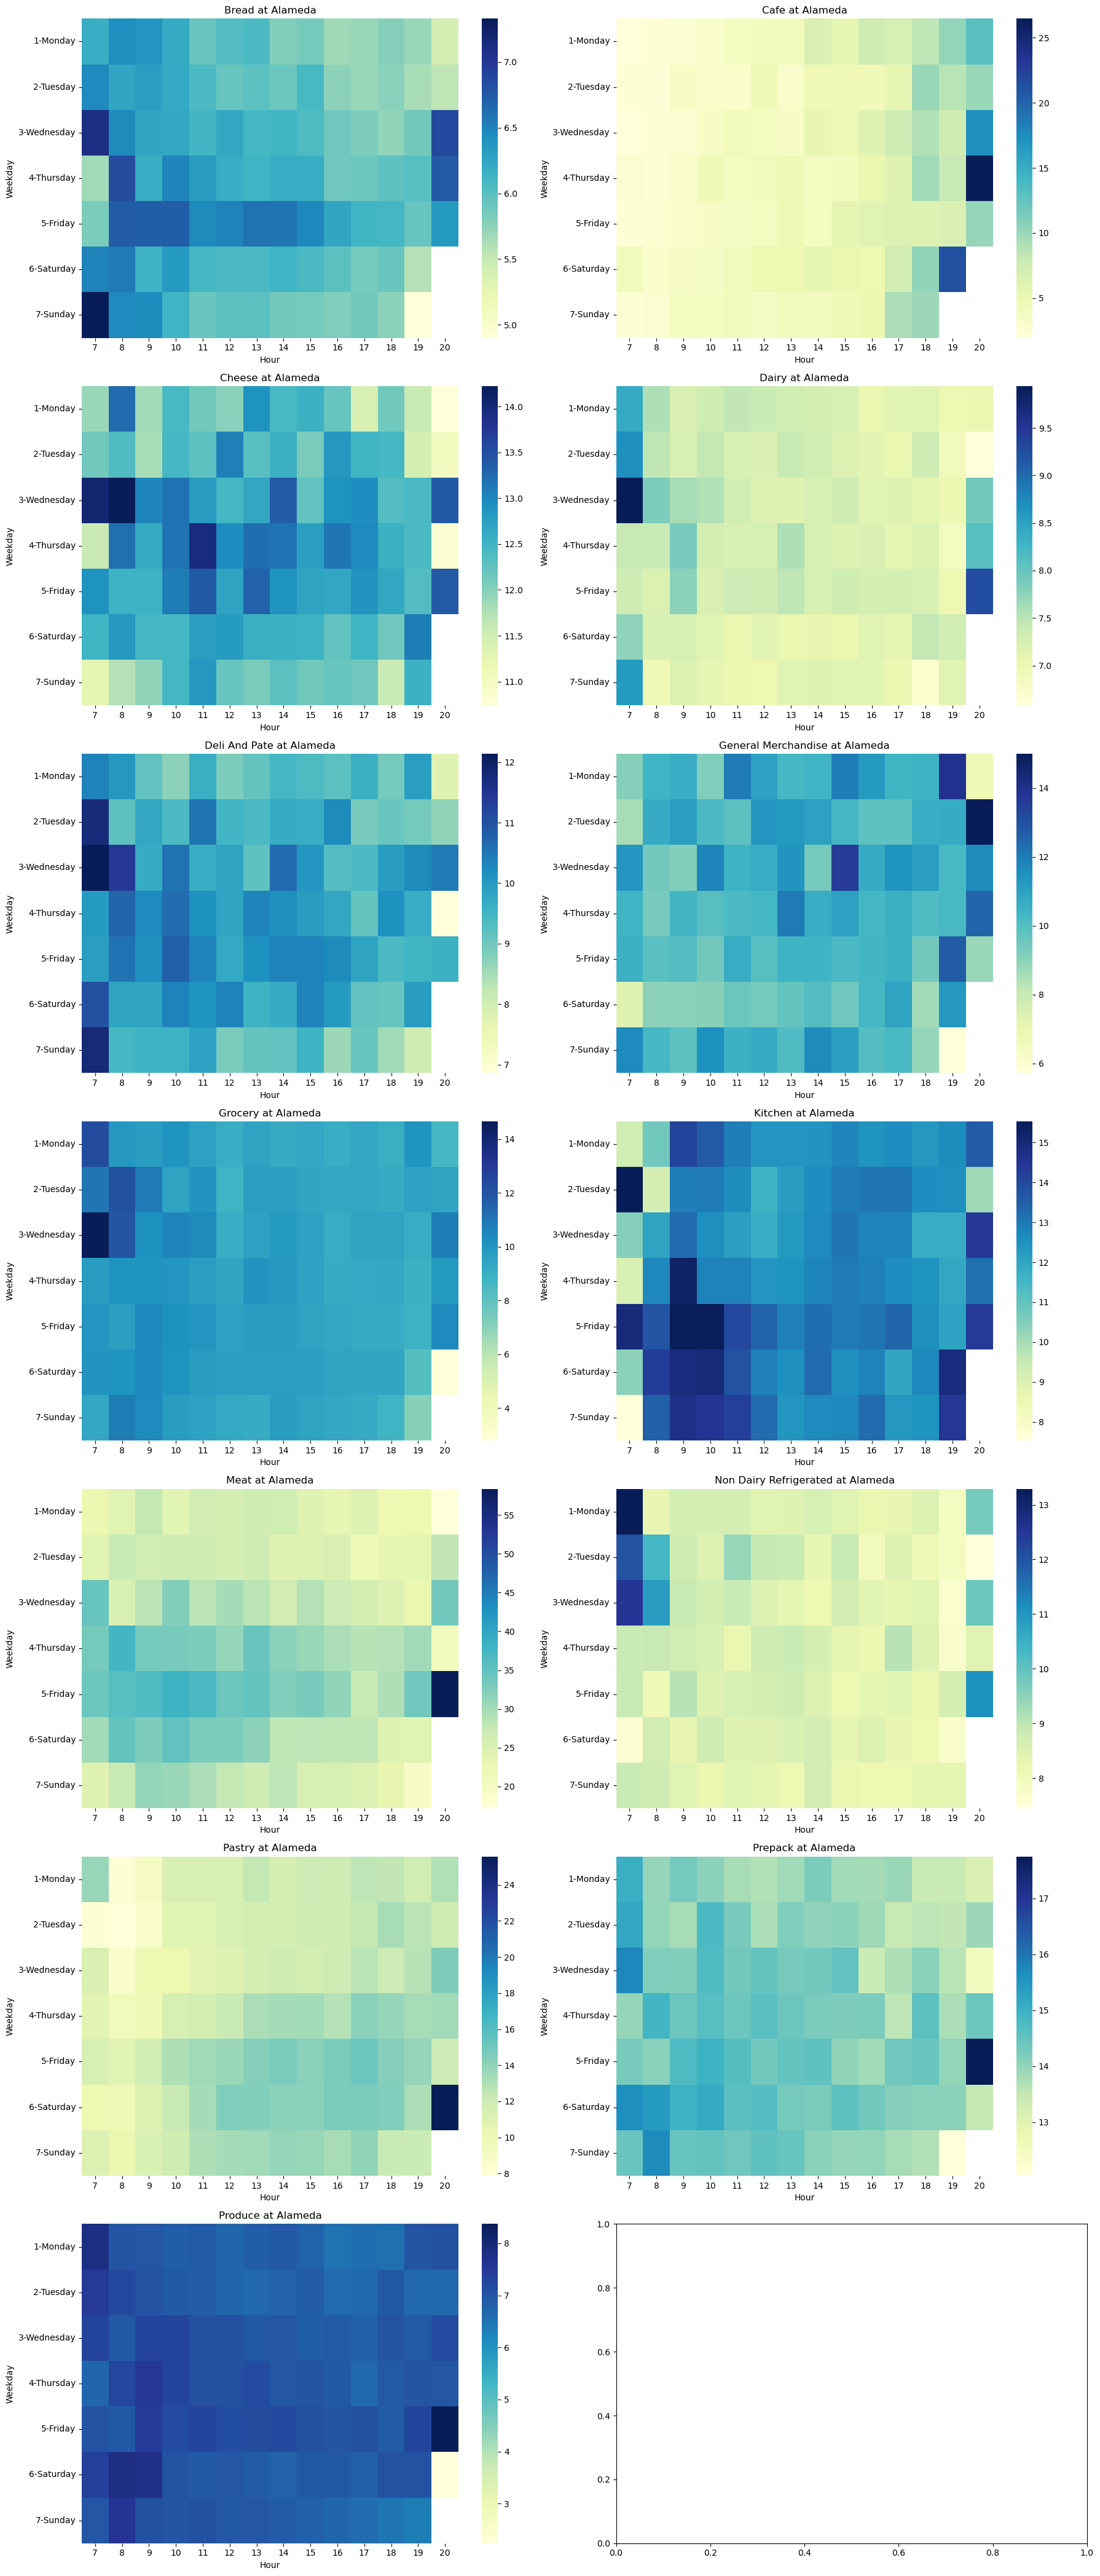

In [20]:
# Define the number of unique locations and departments
locations = ['Alameda'] #Alameda Only
departments = df['Department'].unique()

# Determine the grid size for the subplots
num_plots = len(locations) * len(departments)
cols = 2  # You can change this to the desired number of columns
rows = (num_plots + cols - 1) // cols  # Calculate the number of rows needed

fig, axes = plt.subplots(rows, cols, figsize=(18, rows * 6))

# Flatten the axes array for easy indexing
axes = axes.flatten()

plot_index = 0
for location in locations:
    for department in departments:
        # Filter data for the specific location and department
        subset = df[(df['Location'] == location) & (df['Department'] == department)]
        
        # Pivot the data to create a matrix for the heatmap
        heatmap_data = subset.pivot_table(values='Average_Amount', index='Weekday', columns='TimeStamp', aggfunc='sum')
        
        # Plot the heatmap in the corresponding subplot
        sns.heatmap(heatmap_data, cmap="YlGnBu", ax=axes[plot_index])
        
        # Add titles and labels
        axes[plot_index].set_title(f'{department} at {location}')
        axes[plot_index].set_xlabel('Hour')
        axes[plot_index].set_ylabel('Weekday')
        
        plot_index += 1

# Adjust layout to make room for titles and labels
plt.tight_layout()
plt.savefig(f'heatmap.png', bbox_inches='tight')
plt.show()
